## Final Project: Agricultural Analysis and Temperature Prediction

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import time

In [4]:
# read file
originaldata = pd.read_csv("./testset.csv")
originaldata


NameError: name 'pd' is not defined

In [3]:
originaldata.shape
originaldata.head

NameError: name 'originaldata' is not defined

## Preliminary Visualization

/Users/rohit1/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/rohit1/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


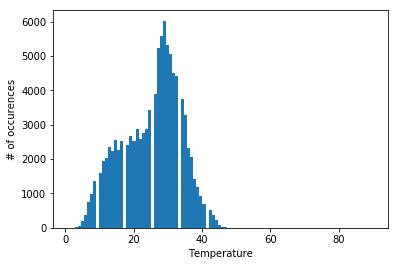

In [24]:
data = originaldata
plt.hist(data[' _tempm'], bins=100, histtype='stepfilled')
plt.xlabel("Temperature")
plt.ylabel("# of occurences")
plt.show()

In [ ]:
cond = {b:a for a, b in enumerate(data[' _conds'].unique())}

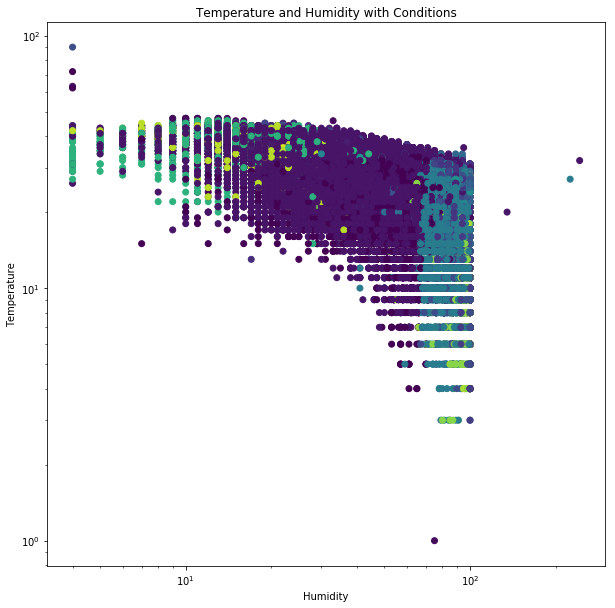

In [37]:
plt.figure(figsize=(10,10))
plt.scatter(data[' _hum'], data[' _tempm'], c=[cond[e] for e in data[' _conds']])
plt.title('Temperature and Humidity with Conditions')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.xscale('log')
plt.yscale('log')
plt.show()

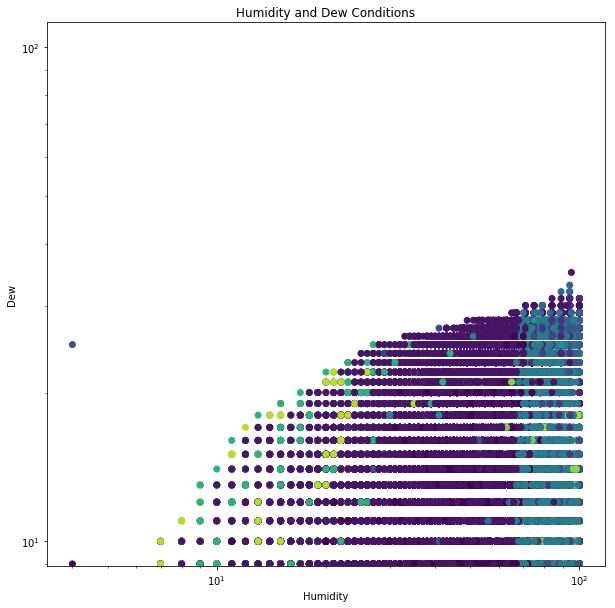

In [38]:
plt.figure(figsize=(10,10))
plt.scatter(data[' _hum'], data[' _dewptm'], c=[cond[e] for e in data[' _conds']])
plt.title('Humidity and Dew Conditions')
plt.xlabel('Humidity')
plt.ylabel('Dew')
plt.xscale('log')
plt.yscale('log')
plt.show()

## Data Preprocessing

In [4]:
# preprocessing

#get rid of useless columns
salary = salary.drop(['LocationRaw', 'SalaryRaw', 'SourceName'], axis=1)

#this loop does preprocessing on columns that are strings
for n in salary.columns:
    if salary[n].dtype == 'object':
        salary[n] = salary[n].str.lower()
        salary[n] = salary[n].str.strip()

#replace null values with the mode (most frequent occurence in the feature)
salary['Title'].fillna(value=salary['Title'].value_counts().axes[0][0], inplace=True)
salary['ContractType'].fillna(value=salary['ContractType'].value_counts().axes[0][0], inplace=True)
salary['ContractTime'].fillna(value=salary['ContractTime'].value_counts().axes[0][0], inplace=True)
salary['Company'].fillna(value=salary['Company'].value_counts().axes[0][0], inplace=True)
print (salary.shape)

(10000, 9)


In [5]:
#tf-idf
#first we create vector using only 1000 words and removing useless stop words
#we just consider words that matter to the target variable (salary)
vector = TfidfVectorizer(stop_words='english', max_features=1000)
titleVectorized = pd.DataFrame(vector.fit_transform(salary.Title).toarray(), columns = vector.get_feature_names())
descriptionVectorized = pd.DataFrame(vector.fit_transform(salary.FullDescription).toarray(), columns = vector.get_feature_names())
companyVectorized = pd.DataFrame(vector.fit_transform(salary.Company).toarray(), columns = vector.get_feature_names())
categoryVectorized = pd.DataFrame(vector.fit_transform(salary.Category).toarray(), columns = vector.get_feature_names())
#salary = salary.drop('FullDescription', axis=1)
salary = pd.concat([salary.drop(['Title','FullDescription','Company','Category'], axis=1), titleVectorized,descriptionVectorized,companyVectorized,categoryVectorized], axis=1)
print (salary.shape)

(10000, 3050)


In [ ]:
#preprocess categorical features
#salary = pd.get_dummies(salary, columns=['Title', 'LocationNormalized', 'ContractTime', 'ContractType', 'Company', 'Category'], prefix=['Title', 'LocationNormalized', 'ContractTime', 'ContractType', 'Company', 'Category'])
salary = pd.get_dummies(salary, columns=['LocationNormalized', 'ContractTime', 'ContractType'], prefix=['LocationNormalized', 'ContractTime', 'ContractType'])
print (salary.shape)

## Training and Testing Models

In [ ]:
#split dataset into training and testing 80% 20%
X = salary.drop('SalaryNormalized', axis=1)
Y = salary.SalaryNormalized
pca = PCA(n_components=1000)
pca.fit(X)
X = pca.transform(X)
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, random_state=int(time.time()), test_size=0.20)

## Linear Regression

In [ ]:
lr = LinearRegression().fit(xTrain, yTrain)

#print("lr.coef_:", lr.coef_)
#print("lr.intercept_:", lr.intercept_)

print("Training set score: {:.2f}".format(lr.score(xTrain, yTrain)))
print("Test set score: {:.2f}".format(lr.score(xTest, yTest)))

## Ridge Regression

In [ ]:
ridge = Ridge().fit(xTrain, yTrain)
print("Training set score: {:.2f}".format(ridge.score(xTrain, yTrain)))
print("Test set score: {:.2f}".format(ridge.score(xTest, yTest)))

## Decision Trees

In [ ]:
tree1 = DecisionTreeRegressor(max_depth=5).fit(xTrain, yTrain)
tree2 = DecisionTreeRegressor(max_depth=10).fit(xTrain, yTrain)
print ("Tree of depth 5 Training set score: {:.2f}".format(tree1.score(xTrain, yTrain)))
print ("Tree of depth 5 Test set score: {:.2f}".format(tree1.score(xTest, yTest)))
print ("Tree of depth 10 Training set score: {:.2f}".format(tree2.score(xTrain, yTrain)))
print ("Tree of depth 10 Test set score: {:.2f}".format(tree2.score(xTest, yTest)))
#higher depth means overfitting to the training data and lower accuracy on the testing data

## K-Nearest Neighbors

In [ ]:
for n in range(2,12):
    # this loop tries number of neighbors from 2 to 11
    knn = KNeighborsRegressor(n_neighbors=n)
    # KNN with 6 neighbors was found to be the most accurate in general
    knn.fit(xTrain, yTrain)
    print ("Training set score with " + str(n) + " neighbors: {:.2f}".format(knn.score(xTrain, yTrain)))
    print ("Test set score with " + str(n) + " neighbors: {:.2f}".format(knn.score(xTest, yTest)))

## Gradient Boosted Regression

In [ ]:
gbr = GradientBoostingRegressor()
gbr.fit(xTrain, yTrain)
print("Training set score: {:.3f}".format(gbr.score(xTrain, yTrain)))
print("Test set score: {:.3f}".format(gbr.score(xTest, yTest)))

## Conclusions